In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

We want to solve the ODE
$$
    \frac{d^2y}{dt^2} = y^2 +\cos(2\pi x) - \sin^4(\pi x)
$$
for the given boundary conditions that:
\begin{align*}
    y(x=0) &= 0\\
    y(x=1) &= 0
\end{align*}

In [2]:
## setting up the problem

# defining Boundary conditions
y0 = 0.0  # initial position
yL = 0.0  # final position

# defining time interval
x0 = 0.0
xE = 1.0
xeval = np.linspace(x0,xE,100)


# defining function for system of ODEs
def derivs(x,s):
    """
    Function for the system of ODEs
    dy/dt = v
    dv/dt = y^2 + cos(2*pi*x) - sin^4(pi*x)
    
    Parameters
    ----------
    x : position (float)
    s : state vector  (float)
        s[0] = y(x)
        s[1] = dy/dx == v(x)
    """
    y = s[0]
    v = s[1]
    
    dvdx = y**2 + np.cos(2*np.pi*x) - (np.sin(np.pi*x))**4
    return [v, dvdx]

## getting accurate dy/dx using root finding approach

# defining objective function as a function of guess derivative
def objective(v):
    sol = solve_ivp(derivs,[x0,xE],np.array([y0,v], dtype='object'),t_eval=xeval)
    end_point = sol.y[0][-1]
    return end_point - yL

vRoot = fsolve(objective,-1)
print("Optimal dy/dx: %2.3f"%vRoot)


Optimal dy/dx: 0.184


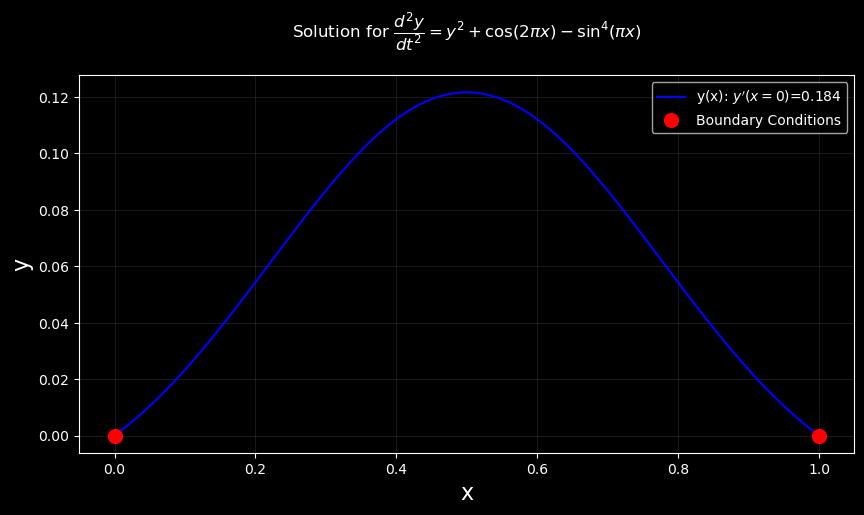

In [3]:
# obtaining solution for vRoot
sol = solve_ivp(derivs,[x0,xE],np.array([y0,vRoot], dtype='object'),t_eval=xeval)

# plotting the solution
plt.figure(figsize=(10,5), dpi=100)
plt.plot(xeval,sol.y[0],color='blue', label="y(x): $y\'(x=0)$=%2.3f"%vRoot)
# plotting the boundary conditions
plt.plot([x0,xE],[y0,y0],'ro', ms = 10, label='Boundary Conditions')
plt.grid(alpha=0.1)
plt.legend(loc=1)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('Solution for $\\dfrac{d^2y}{dt^2} = y^2 +\cos(2\pi x) - \sin^4(\pi x)$\n')
plt.savefig('Assignment3.jpg', bbox_inches='tight', dpi=300)